<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Improving Computer Vision Accuracy using Convolutions





# Shallow Neural Network

In the previous lessons, you saw how to do fashion recognition using a neural network containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and only one hidden layer. You experimented with the impact of different sizes of hidden layer, number of training epochs etc on the final accuracy. For convenience, here's the entire code again. Run it and take a note of the test accuracy that is printed out at the end. 

In [50]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
# so the pixel will be a number between 0 and 1
training_images = training_images / 255.0
test_images = test_images / 255.0

In [51]:


# Define the model
model = tf.keras.models.Sequential([
    
    # flatten layer that convert 28X28 array into 784 array
    tf.keras.layers.Flatten(),

    # hidden layer with 128 units
    # activation of type relu
    tf.keras.layers.Dense(128, activation=tf.nn.relu),

    # output layer with 10 units/classes
    # activation of type softmax
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5


2024-05-06 20:54:57.554232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 9ms/step - loss: 0.4948 - accuracy: 0.8275
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3730 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3351 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3121 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2944 - accuracy: 0.8910

MODEL EVALUATION:
  7/313 [..............................] - ETA: 2s - loss: 0.2701 - accuracy: 0.8973  

2024-05-06 20:56:16.042546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.3569 - accuracy: 0.8743


## Convolutional Neural Network

In the model above, your accuracy will probably be about 89% on training and 87% on validation. Not bad. But how do you make that even better? One way is to use something called _convolutions_. We're not going into the details of convolutions in this notebook (please see resources in the classroom), but the ultimate concept is that they narrow down the content of the image to focus on specific parts and this will likely improve the model accuracy. 

If you've ever done image processing using a filter (like [this](https://en.wikipedia.org/wiki/Kernel_(image_processing))), then convolutions will look very familiar. In short, you take an array (usually 3x3 or 5x5) and scan it over the entire image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 matrix that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision because it often highlights features that distinguish one item from another. Moreover, the amount of information needed is then much less because you'll just train on the highlighted features.

That's the concept of **Convolutional Neural Networks**. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focused and possibly more accurate.

Run the code below. This is the same neural network as earlier, but this time with [Convolution](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers added first. It will take longer, but look at the impact on the accuracy.

In [52]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 800)               0         
                                                                 
 dense_20 (Dense)            (None, 128)             

2024-05-06 20:56:45.896807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 26s 13ms/step - loss: 0.4725 - accuracy: 0.8291
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3210 - accuracy: 0.8829
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2784 - accuracy: 0.8979
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2471 - accuracy: 0.9092
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2231 - accuracy: 0.9168

MODEL EVALUATION:
  1/313 [..............................] - ETA: 1:22 - loss: 0.5130 - accuracy: 0.9375

2024-05-06 20:58:39.260862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.2670 - accuracy: 0.9037


It's likely gone up to about 92% on the training data and 90% on the validation data. That's significant, and a step in the right direction!

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a [Conv2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D). The parameters are:

1. The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.
2. The size of the Convolution. In this case, a 3x3 grid.
3. The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning `x` when `x>0`, else return `0`.
4. In the first layer, the shape of the input data.

You'll follow the convolution with a [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convolution. By specifying `(2,2)` for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.

You can call `model.summary()` to see the size and shape of the network, and you'll notice that after every max pooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


Then you added another convolution and flattened the output.



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
  tf.keras.layers.Flatten(),
  
```


After this, you'll just have the same DNN structure as the non convolutional version. The same dense layer with 128 neurons, and output layer with 10 neurons as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


## About overfitting

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called _overfitting_. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

# Visualizing the Convolutions and Pooling

Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index `0`, index `23` and index `28` are all the same value (i.e. `9`). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [22]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


2024-05-06 19:45:39.343406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


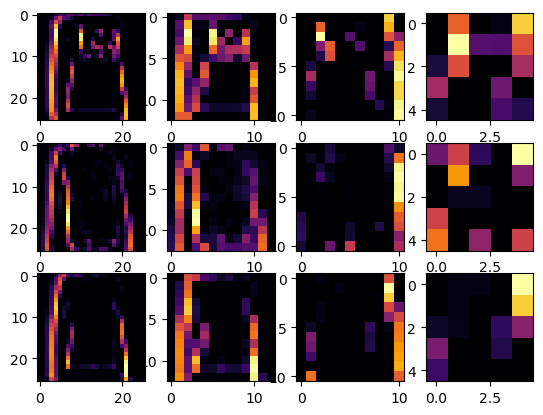

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

# creating 12 subplots
# 3 rows and 4 colummns
f, axarr = plt.subplots(3,4)


# setting the images for the subplot
# we can take a look at the above list of images
FIRST_IMAGE=1
SECOND_IMAGE=16
THIRD_IMAGE=99

# up to 31
CONVOLUTION_NUMBER = 3

# printing the 7 layers
# which is the same as summary
for i in range (len(model.layers)):
  print(model.layers[i])



# the number of layers are 7
# list comprehension of the layers outputs
layer_outputs = [layer.output for layer in model.layers]



# creating Functional type model
# and it's another model to display each layer output
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)


# print activation_model summary
# activation_model.summary()


# looping over the number of subplots
for x in range(0,4):

  # making prediction for the first image
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  
  # making prediction for the second image
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  
  # making prediction for the third image
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

#### Exercise 1: Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

In [48]:
# Define the model with convolutions of 16
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling

  # Change the Convolutions number to 16 then 64
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Change the Convolutions number to 16 then 64
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

2024-05-06 20:43:55.433422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 30s 15ms/step - loss: 0.4369 - accuracy: 0.8412
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2896 - accuracy: 0.8927
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2455 - accuracy: 0.9097
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2139 - accuracy: 0.9197
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1847 - accuracy: 0.9305

MODEL EVALUATION:
  1/313 [..............................] - ETA: 1:11 - loss: 0.5553 - accuracy: 0.8750

2024-05-06 20:46:21.130943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.2522 - accuracy: 0.9085


**Exercise 1 Answers:**

1. For 16 Convolutions:
   - The Accuracy and Loss have dropped by 0.02, possibly because the model did not capture enough features
   - The training time was faster, due to the lower number of parameters (113,386) to be trained

2. For 64 Convolutions:
   - The Accuracy and Loss have increased during the training, but dropped during the evalution. As it captured more features.
   - The training time was slower, due to the higher number of parameters (243,786) to be trained

#### Exercise 2: Remove the final Convolution. What impact will this have on accuracy or training time?

In [49]:
# Define the model with removed final convolution
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling

  # Change the Convolutions number to 16 then 64
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Change the Convolutions number to 16 then 64
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5) # type: ignore

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1152)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               147584    
                                                                 
 dense_17 (Dense)            (None, 10)               

2024-05-06 20:50:09.119290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.4677 - accuracy: 0.8339
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3283 - accuracy: 0.8813
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2905 - accuracy: 0.8936
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2661 - accuracy: 0.9017
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2444 - accuracy: 0.9090

MODEL EVALUATION:
  1/313 [..............................] - ETA: 1:08 - loss: 0.6057 - accuracy: 0.9062

2024-05-06 20:51:49.346809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.2872 - accuracy: 0.8979


**Exercise 2 Answers:**

- The accuracy and loss have gotten worse slightly because of the removal
- Training time became shorter by 1 minutes


#### Exercise 3: How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [54]:

# Define the model with more convolutions
model = tf.keras.models.Sequential([
                                                         
  # same as original layers
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Added more Convolution
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5) # type: ignore

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 1, 32)       

2024-05-06 21:03:38.555583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 27s 14ms/step - loss: 0.6402 - accuracy: 0.7638
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4354 - accuracy: 0.8409
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3795 - accuracy: 0.8618
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3466 - accuracy: 0.8729
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3201 - accuracy: 0.8821

MODEL EVALUATION:


2024-05-06 21:05:55.174585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 12ms/step - loss: 0.3528 - accuracy: 0.8710


**Exercise 3 Answers:**

By adding more convolution layers, the impacts are the following

- Accuracy and loss have gotten much worse in both training and evaluation.
- Training time have increased due to higher number of trainable parameters (24,330)

#### Exercise 4: Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

In [59]:

# Define the model with more convolutions
model = tf.keras.models.Sequential([
                                                         
  # same as original layers
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # removing the other convolutions  
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),


  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5) # type: ignore

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 5408)              0         
                                                                 
 dense_34 (Dense)            (None, 128)               692352    
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

2024-05-06 21:21:29.439888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 25s 13ms/step - loss: 0.3873 - accuracy: 0.8632
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2640 - accuracy: 0.9029
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2205 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1882 - accuracy: 0.9297
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1613 - accuracy: 0.9398

MODEL EVALUATION:


2024-05-06 21:23:21.959591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 8ms/step - loss: 0.2529 - accuracy: 0.9122


**Exercise 4 Answers:**

By removing other convolution layers, the impacts are the following:

- Accuracy and loss don't have much difference compared to the original model
- Training time did not see much difference compared to original model


However, by removing other convolution layers + maxpooling, the impacts are the following:

- Accuracy and loss have improved slighltly compared to original model
  - original model - loss: 0.2670 - accuracy: 0.9037
  - new model - loss: 0.2529 - accuracy: 0.9122
- Training time did not see much difference compared to original model

#### Exercise 5: In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

In [57]:
class myCallback(tf.keras.callbacks.Callback):
    '''
    stops training once accuracy reaches 0.90
    Args:
        epoch(int): index of current epoch
    '''
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.90):
            print('\nAccuracy is more than 0.90, so training will be stopped')
            self.model.stop_training = True



# Define the model with callback
model = tf.keras.models.Sequential([
                                                         
  # convolution and max pooling layers
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# create new instance of myCallback
callbacks = myCallback()


# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks]) # type: ignore

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 800)               0         
                                                                 
 dense_30 (Dense)            (None, 128)             

2024-05-06 21:11:47.373261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 23s 12ms/step - loss: 0.4667 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3185 - accuracy: 0.8844
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2754 - accuracy: 0.8989
Epoch 4/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.2454 - accuracy: 0.9093
Accuracy is more than 0.90, so training will be stopped
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2454 - accuracy: 0.9093

MODEL EVALUATION:
  1/313 [..............................] - ETA: 1:21 - loss: 0.5357 - accuracy: 0.9062

2024-05-06 21:13:29.788553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.2701 - accuracy: 0.9018


**Exercise 5 Answers:**

The training have stopped during the 4 epoch once it's greater than 4 epochs